# Special Effects using Convolution

Convolution can be used to achieve some pretty exciting effects! We're going to help you get some practice applying convolution to adding creative effects to images!

<img src="lesson_files/frog3d.png" width="500"/>

In the intro, we covered two effects: **blurring** and **sharpening**. Here's we'll cover 2 more advanced effects: **edge detection** and **glow**. Before we start, copy the functions you wrote in `conv_intro.ipynb` to reuse what you have!

In [5]:
# Add your functions from conv_intro.ipynb here!
import numpy as np
import cv2
import matplotlib.pyplot as plt
def conv_image(img, kernel, edge_behavior='black'):
    if edge_behavior not in ['black', 'extend']:
        raise ValueError("Invalid edge behavior. Must be 'black' or 'extend'.")

    img = img.astype(np.float32)
    kernel = kernel.astype(np.float32)

    kh, kw = kernel.shape

    def conv_single_channel(channel):
        h, w = channel.shape

        if edge_behavior == 'black':
            padded = np.pad(
                channel,
                ((kh//2, kh//2), (kw//2, kw//2)),
                mode='constant',
                constant_values=0
            )
        else:
            padded = np.pad(
                channel,
                ((kh//2, kh//2), (kw//2, kw//2)),
                mode='edge'
            )

        output = np.zeros((h, w), dtype=np.float32)

        for y in range(h):
            for x in range(w):
                patch = padded[y:y+kh, x:x+kw]
                output[y, x] = np.sum(patch * kernel)

        return output
def blur_image(img):
    kernel = np.ones((10,10), dtype=np.float32) / 100
    return conv_image(img, kernel)

### Edge Detection using the Sobel Operator

The Sobel operator is a cool trick for detecting edges, or outlines, in your image. We will walk you through how it works here. We will provide you 2 kernels $K$ and $J$, which will detect horizontal and vertical edges in your image. We will combine the outputs of the two kernels to achieve our final output using the following equation:

$$
F = \text{round}(\sqrt{I_K^2 + I_J^2})
$$

$F$ is our final image. $\text{round}$ means that we are rounding to the nearest whole number. $I_K$ is the output of applying kernel $K$ to the image. $I_J$ is the output of applying kernel $J$ to the image. When we apply our kernels for the Sobel operator, we use the **extend** behavior and we **don't clip** until the very end.

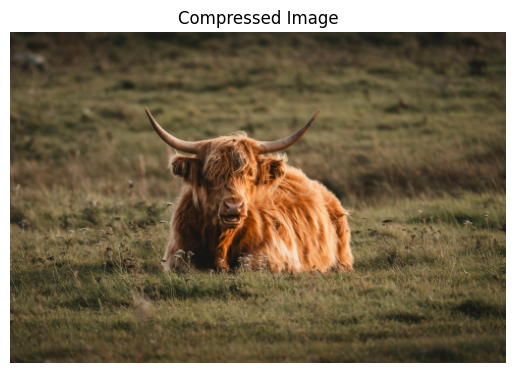

In [4]:
# STEP 1: Find an image online that you want to work with! We have provided helper code below to compress your image
# so the code runs faster. Your new image will be saved as `compressed.jpg`. Use this image for the rest of the notebook.
import cv2
from matplotlib import pyplot as plt
import numpy as np

image_name = "images/cow.jpg"

# Read the image
img = cv2.imread(image_name)

# Get original dimensions
height, width = img.shape[:2]

# Compute new dimensions (quarter of original size)
new_width = width // 2
new_height = height // 2

# Resize the image
compressed_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

# Save the compressed image
cv2.imwrite('compressed.jpg', compressed_img)
# Convert BGR (OpenCV default) to RGB for displaying with matplotlib
compressed_img_rgb = cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB)

# Display the compressed image
plt.imshow(compressed_img_rgb)
plt.title("Compressed Image")
plt.axis('off')
plt.show()

In [12]:
# STEP 1: Make your images from kernels K and J here!
K = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])
J = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# STEP 2: Apply the Sobel operator to your image! Remember to use the extend behavior and don't clip until the very end.
# YOUR CODE HERE
image = cv2.imread('compressed.jpg')
I_K = conv_image(image, K, edge_behavior='extend')
I_J = conv_image(image, J, edge_behavior='extend')

In [7]:
# STEP 3: Follow the equation above to combine the outputs of the two kernels!
# YOUR CODE HERE
final_image = np.round(np.sqrt(I_K**2 + I_J**2))
final_image = np.clip(final_image, 0, 255).astype(np.uint8)

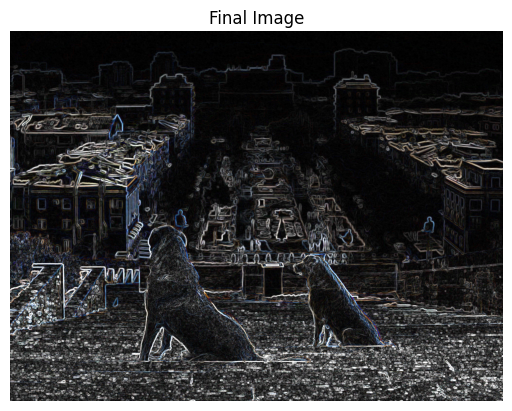

In [14]:
# STEP 4: Display your final image!

plt.imshow(final_image)
plt.title("Final Image")
plt.axis('off')
plt.show()

### Glow Effect

<img src="lesson_files/glow_effect.png" width="800"/>

A glow effect can be made by taking the highlights or brighter spots in an image and blurring them, so that they spread out more. We will be teaching you how to implement this, and your challenge is to code it up.

##### Step 1: Find the highlights
To find the highlights in an image, you can look at the black and white version of the image and use these values as the brightness.

##### Step 2: Threshold the highlights
Create a mask by selecting only the pixels above a certain brightness threshold. This isolates the brighter regions that will be used to generate the glow.

##### Step 3: Blur the highlights
Apply a blur to the highlight mask you created in the previous step. This will create the glowing effect by spreading out the brightness.

##### Step 4: Add the glow to the original image
Combine the blurred highlights back onto the original image by adding or overlaying the blurred result. Clip any values so that they remain valid image pixel values.

*Tip: For more blur, use larger blur kernels!*

In [17]:
# YOUR CODE HERE
greyscale = np.dot(img[..., :], [0.114, 0.587, 0.299])
highlights = greyscale.copy()
highlights[highlights < 128] = 0


blur_kernel = np.ones((10, 10)) / 100
blurred_highlights = conv_image(highlights,
                                blur_kernel,
                                edge_behavior="extend")
blurred_highlights_stacked = np.stack([blurred_highlights] * 3,
                                      axis = 2)
glow_img = img + blurred_highlights_stacked
glow_img = np.clip(glow_img, 0, 255).astype(np.uint8)

plt.imshow(cv2.cvtColor(glow_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

NameError: name 'conv_image' is not defined